# About

This notebook is used to test stages of the track pattern recognition.

In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
% matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

# Data reading

In [3]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


# Get reconstructible events

In [4]:
# from ReconstructibleTracks import get_reconstractible_tracks

# reconstructible_events = {}

# for event_id in range(0, 100):
    
#     tracks = get_reconstractible_tracks(event_id, all_hits, all_mctracks, all_velo_points)
    
#     if tracks != []:
#         reconstructible_events[event_id] = tracks

# Y-view pattern recognition. 1&2 stations.

### modify_for_yz_analysis

In [81]:
from Y_views_new2 import *
event_id = 1090#2277#1204#2277#1242
event = all_hits[all_hits['event'] == event_id]
event2 = all_hits[all_hits['event'] == event_id]

event = modify_for_yz_analysis_1_2(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
40916,40916,-29.922173,132.496384,2581.149414,2,383.918274,1,0,0,0,209,0.383614,1090,37,132.8686,2581.15
40879,40879,-29.217447,133.509995,2582.254883,3,383.951416,1,0,0,1,209,0.250058,1090,0,133.7486,2582.25
40917,40917,-29.952663,132.492935,2583.750000,2,383.998901,1,0,1,0,209,0.052942,1090,38,132.4286,2583.75
40880,40880,-29.210072,133.559677,2584.845459,3,384.037659,1,0,1,1,209,0.239721,1090,1,133.3086,2584.85
40924,40924,-30.273916,132.458084,2611.149414,2,384.920959,1,3,0,0,209,0.421919,1090,45,132.8686,2611.15
40885,40885,-29.132084,134.084366,2612.243896,3,384.953766,1,3,0,1,209,0.324432,1090,6,133.7486,2612.25
40925,40925,-30.286821,132.456741,2612.250488,2,384.960144,1,3,0,1,210,0.456736,1090,46,131.9886,2612.25
40886,40886,-29.127790,134.113205,2613.751709,3,385.000183,1,3,1,0,208,0.086804,1090,7,134.1886,2613.75
40926,40926,-30.304394,132.454941,2613.750000,2,384.999603,1,3,1,0,209,0.014943,1090,47,132.4286,2613.75
40887,40887,-28.648567,137.298233,2782.249756,3,390.621460,2,0,0,1,207,0.018229,1090,8,137.2686,2782.25


In [41]:
track = event[event.TrackID - event.StatNb == 1]
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
68440,68440,-14.182525,-206.657471,2581.165039,2,385.021454,1,0,0,0,402,0.143315,1655,36,-206.8114,2581.15
68441,68441,-14.127305,-206.932556,2583.782227,2,385.112732,1,0,1,0,402,0.309142,1655,37,-207.2514,2583.75
68447,68447,-13.550735,-209.844818,2611.200684,2,386.047211,1,3,0,0,404,0.477874,1655,43,-210.3314,2611.15
68448,68448,-13.475853,-210.230957,2614.812500,2,386.161041,1,3,1,1,404,0.352966,1655,44,-209.8914,2614.85
68449,68449,-9.989813,-229.413406,2781.183838,2,391.777466,2,0,0,0,415,0.268734,1655,45,-229.6914,2781.15
68450,68450,-9.935345,-229.745239,2783.797607,2,391.869171,2,0,1,0,415,0.377772,1655,46,-230.1314,2783.75
68457,68457,-9.386158,-233.300140,2811.136719,2,392.788422,2,3,0,0,417,0.101024,1655,53,-233.2114,2811.15
68458,68458,-9.335693,-233.649246,2813.748779,2,392.876495,2,3,1,0,417,0.009329,1655,54,-233.6514,2813.75


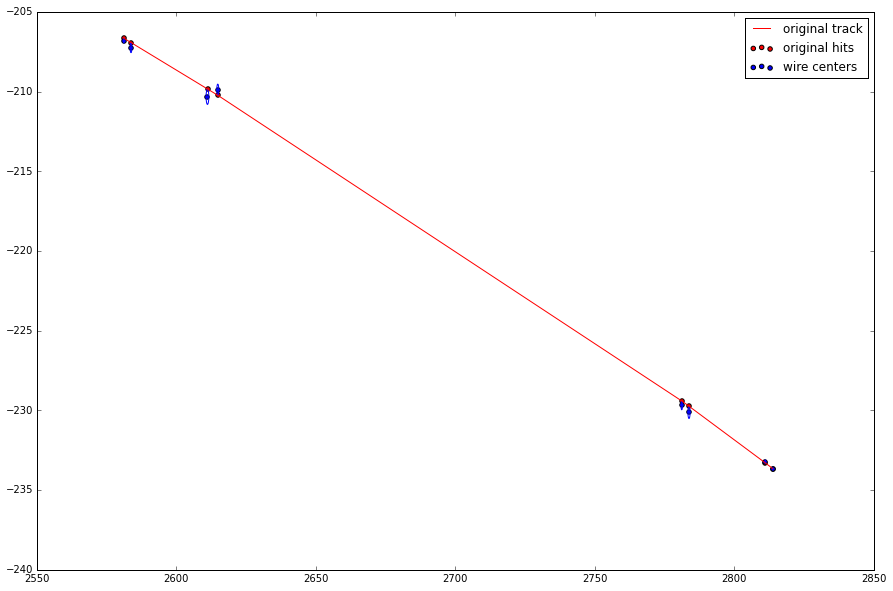

In [42]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)


plt.legend(loc='best')
plt.show()

### conventor_yz

In [43]:
hits = conventor_yz(event, 0)
hits

{2581.1500000000001: [<Y_views_new2.ParametresYZ instance at 0x111a93248>],
 2582.25: [<Y_views_new2.ParametresYZ instance at 0x11458bef0>],
 2583.75: [<Y_views_new2.ParametresYZ instance at 0x11458b200>],
 2584.8499999999999: [<Y_views_new2.ParametresYZ instance at 0x1146accb0>],
 2611.1500000000001: [<Y_views_new2.ParametresYZ instance at 0x110d8fbd8>],
 2612.25: [<Y_views_new2.ParametresYZ instance at 0x110e10bd8>],
 2613.75: [<Y_views_new2.ParametresYZ instance at 0x111ae8ef0>],
 2614.8499999999999: [<Y_views_new2.ParametresYZ instance at 0x111ae8830>],
 2781.1500000000001: [<Y_views_new2.ParametresYZ instance at 0x110df3c68>,
  <Y_views_new2.ParametresYZ instance at 0x110df36c8>],
 2783.75: [<Y_views_new2.ParametresYZ instance at 0x114d6b758>,
  <Y_views_new2.ParametresYZ instance at 0x110e0d440>],
 2811.1500000000001: [<Y_views_new2.ParametresYZ instance at 0x110e0ddd0>,
  <Y_views_new2.ParametresYZ instance at 0x110e0d098>],
 2813.75: [<Y_views_new2.ParametresYZ instance at 0x11

### points_crossing_line_yz

In [44]:
import cPickle as pickle

clf_pickle2 = open('classifier_y.pkl', 'rb')
clf_y = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open('classifier_stereo.pkl', 'rb')
clf_stereo = pickle.load(clf_pickle2)
clf_pickle2.close()

In [45]:
z1 = track.Wz.min()
z2 = track.Wz.max()
y1 = track.Wy.min()
y2 = track.Wy.max()

plane_k = (y2 - y1) / (z2 - z1)
plane_b = y1 - plane_k * z1
plane_width = 5.85
n_min = 5



indicator, crossing_points, lin_regr = points_crossing_line_yz_new(plane_k, plane_b, plane_width, hits, n_min, clf_y, clf_stereo, event, 0, event2)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
print plane_b, plane_k

In [ ]:
crossing_points

In [ ]:
lin_regr

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# crossing point
Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
Y_line_crossing = Z_crossing * lin_regr[1] + lin_regr[0]

plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

### loop_yz

In [46]:
numpy.polyfit(track.Z.values, track.Y.values, 1)

array([ -0.11576013,  92.30320638])

In [55]:
tracks, linking_table = loop_yz_new(event, 5, 100.87, 0, clf_y, clf_stereo, 0, event2)

In [56]:
linking_table

{1: Int64Index([68404, 68420, 68413, 68410, 68419, 68405, 68412, 68411], dtype='int64')}

In [57]:
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
68440,68440,-14.182525,-206.657471,2581.165039,2,385.021454,1,0,0,0,402,0.143315,1655,36,-206.8114,2581.15
68404,68404,-115.566917,112.425331,2582.252930,3,384.048096,1,0,0,1,221,0.214686,1655,0,112.6286,2582.25
68441,68441,-14.127305,-206.932556,2583.782227,2,385.112732,1,0,1,0,402,0.309142,1655,37,-207.2514,2583.75
68405,68405,-115.595261,112.459610,2584.846680,3,384.135468,1,0,1,1,221,0.259634,1655,1,112.1886,2584.85
68447,68447,-13.550735,-209.844818,2611.200684,2,386.047211,1,3,0,0,404,0.477874,1655,43,-210.3314,2611.15
68410,68410,-115.894356,112.822823,2612.247559,3,385.048279,1,3,0,1,221,0.182841,1655,6,112.6286,2612.25
68411,68411,-115.910782,112.842842,2613.753174,3,385.099365,1,3,1,0,220,0.237179,1655,7,113.0686,2613.75
68448,68448,-13.475853,-210.230957,2614.812500,2,386.161041,1,3,1,1,404,0.352966,1655,44,-209.8914,2614.85
68412,68412,-117.736443,115.124779,2781.152100,3,390.682892,2,0,0,0,219,0.155237,1655,8,115.2686,2781.15
68449,68449,-9.989813,-229.413406,2781.183838,2,391.777466,2,0,0,0,415,0.268734,1655,45,-229.6914,2781.15


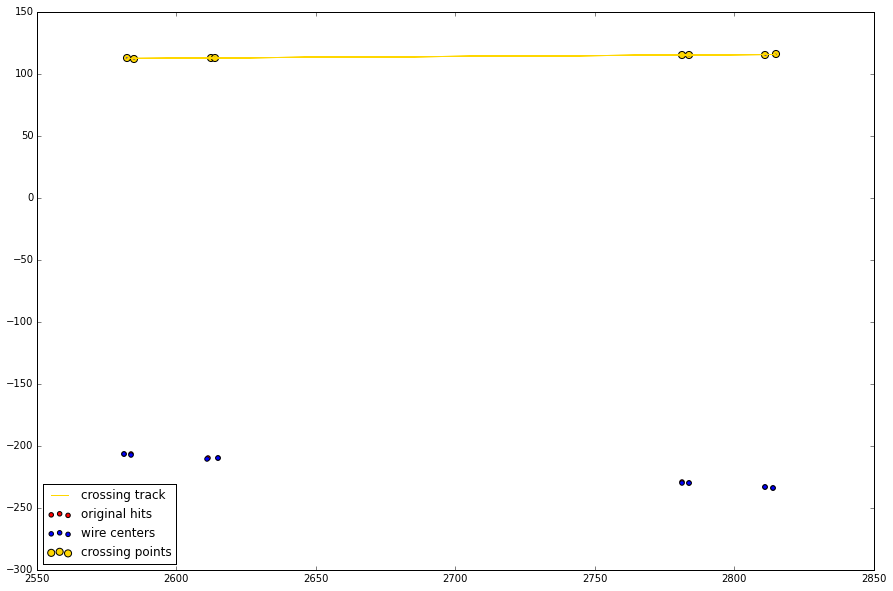

In [58]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = event.Wz.values
Wy = event.Wy.values
Z = event.Z.values
Y = event.Y.values
R = event.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# loop_yz
for key in linking_table:
    
    crossing_points = linking_table[key]
    lin_regr = tracks[key]
    Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
    Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
    Y_line_crossing = Z_crossing * lin_regr[1] + lin_regr[0]

    plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Stereo-view pattern recognition. 1&2 stations.

In [223]:
import cPickle as pickle

clf_pickle2 = open('classifier_y.pkl', 'rb')
clf_y = pickle.load(clf_pickle2)
clf_pickle2.close()

clf_pickle2 = open('classifier_stereo.pkl', 'rb')
clf_stereo = pickle.load(clf_pickle2)
clf_pickle2.close()

In [213]:
import UV_views

def get_zx_hits(event, zy_plane_k, zy_plane_b):
    
    stereo_hits = UV_views.modify_for_xz_analysis_1_2(event)
    
    stereo_hits['Wy'] = zy_plane_k * stereo_hits.Wz.values + zy_plane_b
    stereo_hits['Wx'] = (stereo_hits.Wx2.values - stereo_hits.Wx1.values) / (stereo_hits.Wy2.values - stereo_hits.Wy1.values) * \
                        (stereo_hits.Wy.values - stereo_hits.Wy1.values) + stereo_hits.Wx1.values
    
    return stereo_hits#[numpy.abs(stereo_hits.Wx.values) < 300]

In [66]:
event_id = 1655#515#2277#1204#2277#1242
event = all_hits[all_hits['event'] == event_id]

event_y = modify_for_yz_analysis_1_2(event)

track = event_y[event_y.TrackID - event_y.StatNb == 1]
track = event_y[event_y.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
68440,68440,-14.182525,-206.657471,2581.165039,2,385.021454,1,0,0,0,402,0.143315,1655,36,-206.8114,2581.15
68441,68441,-14.127305,-206.932556,2583.782227,2,385.112732,1,0,1,0,402,0.309142,1655,37,-207.2514,2583.75
68447,68447,-13.550735,-209.844818,2611.200684,2,386.047211,1,3,0,0,404,0.477874,1655,43,-210.3314,2611.15
68448,68448,-13.475853,-210.230957,2614.812500,2,386.161041,1,3,1,1,404,0.352966,1655,44,-209.8914,2614.85
68449,68449,-9.989813,-229.413406,2781.183838,2,391.777466,2,0,0,0,415,0.268734,1655,45,-229.6914,2781.15
68450,68450,-9.935345,-229.745239,2783.797607,2,391.869171,2,0,1,0,415,0.377772,1655,46,-230.1314,2783.75
68457,68457,-9.386158,-233.300140,2811.136719,2,392.788422,2,3,0,0,417,0.101024,1655,53,-233.2114,2811.15
68458,68458,-9.335693,-233.649246,2813.748779,2,392.876495,2,3,1,0,417,0.009329,1655,54,-233.6514,2813.75


In [62]:
def turbo_fit(track, event, clf_y, clf_stereo):
    
    # y views
    rmlr_y = RobustMarginLinearRegression(2)
    score_y, lr_y = rmlr_y.fit(track)

    dists_y = rmlr_y.dist2track(track)[:, 0]

    data_y = pandas.DataFrame()
    data_y['dist'] = dists_y
    data_y['dist2wire'] = track.dist2Wire.values
    data_y['score'] = [score_y] * len(track)
    data_y['slope'] = [lr_y.coef_[0][0]] * len(track)
    data_y['intercept'] = [lr_y.intercept_[0]] * len(track)
    data_y['dist_div_dist2wire'] = data_y['dist'].values / data_y['dist2wire'].values

    #all_cols = [u'dist', u'dist2wire', u'score', u'dist_div_dist2wire', 'slope', 'intercept']
    all_cols = [u'dist', u'score', 'slope', 'intercept']

    predict_y = clf_y.predict(data_y[all_cols].values)
    
    # stereo views
    stereo_hits = get_zx_hits(event, lr_y.coef_[0][0], lr_y.intercept_[0])

    rmlr_stereo = RobustMarginLinearRegression(2, view='Stereo')
    score_stereo, lr_stereo = rmlr_stereo.fit(stereo_hits)

    dists_stereo = rmlr_stereo.dist2track(stereo_hits)[:, 0]

    data_stereo = pandas.DataFrame()
    data_stereo['dist'] = dists_stereo
    data_stereo['dist2wire'] = stereo_hits.dist2Wire.values
    data_stereo['score'] = [score_stereo] * len(stereo_hits)
    data_stereo['slope'] = [lr_stereo.coef_[0][0]] * len(stereo_hits)
    data_stereo['intercept'] = [lr_stereo.intercept_[0]] * len(stereo_hits)
    data_stereo['dist_div_dist2wire'] = data_stereo['dist'].values / data_stereo['dist2wire'].values

    predict_stereo = clf_stereo.predict(data_stereo[all_cols].values)
    
    if (predict_y == 1).sum() >= 4 or (predict_stereo == 1).sum() >= 4:
        
        return score_y, lr_y, track[predict_y != 0]
    
    else:
        
        return score_y, lr_y, track[predict_y == 1]

In [63]:
score_y, lr_y, track = turbo_fit(track, event, clf_y, clf_stereo)

In [64]:
lr_y.coef_

array([[-0.11317429]])

In [67]:
rmlr_y = RobustMarginLinearRegression(2)
score_y, lr_y = rmlr_y.fit(track)

dists_y = rmlr_y.dist2track(track)[:, 0]

data_y = pandas.DataFrame()
data_y['dist'] = dists_y
data_y['dist2wire'] = track.dist2Wire.values
data_y['score'] = [score_y] * len(track)
data_y['slope'] = [lr_y.coef_[0][0]] * len(track)
data_y['intercept'] = [lr_y.intercept_[0]] * len(track)
data_y['dist_div_dist2wire'] = data_y['dist'].values / data_y['dist2wire'].values

#all_cols = [u'dist', u'dist2wire', u'score', u'dist_div_dist2wire', 'slope', 'intercept']
all_cols = [u'dist', u'score', 'slope', 'intercept']

predict_y = clf_y.predict(data_y[all_cols].values)
predict_y

array([2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
data_y

,dist,dist2wire,score,slope,intercept,dist_div_dist2wire
0,0.381570,0.143315,0.074968,-0.113174,84.782613,2.662462
1,0.068937,0.309142,0.074968,-0.113174,84.782613,0.222996
2,0.079896,0.477874,0.074968,-0.113174,84.782613,0.167191
3,0.904553,0.352966,0.074968,-0.113174,84.782613,2.562720
4,0.010208,0.268734,0.074968,-0.113174,84.782613,0.037984
5,0.245273,0.377772,0.074968,-0.113174,84.782613,0.649263
6,0.054217,0.101024,0.074968,-0.113174,84.782613,0.536678
7,0.000750,0.009329,0.074968,-0.113174,84.782613,0.080388


In [68]:
stereo_hits = get_zx_hits(event, lr_y.coef_[0][0], lr_y.intercept_[0])

rmlr_stereo = RobustMarginLinearRegression(2, view='Stereo')
score_stereo, lr_stereo = rmlr_stereo.fit(stereo_hits)

dists_stereo = rmlr_stereo.dist2track(stereo_hits)[:, 0]

data_stereo = pandas.DataFrame()
data_stereo['dist'] = dists_stereo
data_stereo['dist2wire'] = stereo_hits.dist2Wire.values
data_stereo['score'] = [score_stereo] * len(stereo_hits)
data_stereo['slope'] = [lr_stereo.coef_[0][0]] * len(stereo_hits)
data_stereo['intercept'] = [lr_stereo.intercept_[0]] * len(stereo_hits)
data_stereo['dist_div_dist2wire'] = data_stereo['dist'].values / data_stereo['dist2wire'].values

#all_cols = [u'dist', u'dist2wire', u'score', u'dist_div_dist2wire']

predict_stereo = clf_stereo.predict(data_stereo[all_cols].values)
predict_stereo

array([0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2])

In [69]:
data_stereo

,dist,dist2wire,score,slope,intercept,dist_div_dist2wire
0,3770.803598,0.124495,2.939421,-0.00353,-4.93167,30288.890073
1,6.373515,0.099874,2.939421,-0.00353,-4.93167,63.815603
2,3766.496371,0.352229,2.939421,-0.00353,-4.93167,10693.323235
3,2.846885,0.259574,2.939421,-0.00353,-4.93167,10.967523
4,3581.530811,0.089875,2.939421,-0.00353,-4.93167,39850.004074
5,6.563870,0.148775,2.939421,-0.00353,-4.93167,44.119563
6,3585.750341,0.331697,2.939421,-0.00353,-4.93167,10810.310993
7,10.164185,0.444565,2.939421,-0.00353,-4.93167,22.863215
8,2.965745,0.316306,2.939421,-0.00353,-4.93167,9.376183
9,4060.176318,0.154866,2.939421,-0.00353,-4.93167,26217.399644


In [70]:
stereo_hits[predict_stereo == 1]

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz,Wy,Wx


In [ ]:
#event_id = 51
#event2 = all_hits[all_hits['event'] == event_id]

[plane_k, plane_b] = np.polyfit(track.Z.values, track.Y.values, 1)

rmlr = RobustMarginLinearRegression(n_iter=2, view='Y')
score, lr = rmlr.fit(track)
plane_k, plane_b = lr.coef_[0], lr.intercept_

a = get_zx_hits(event2, plane_k, plane_b, x_width=15)



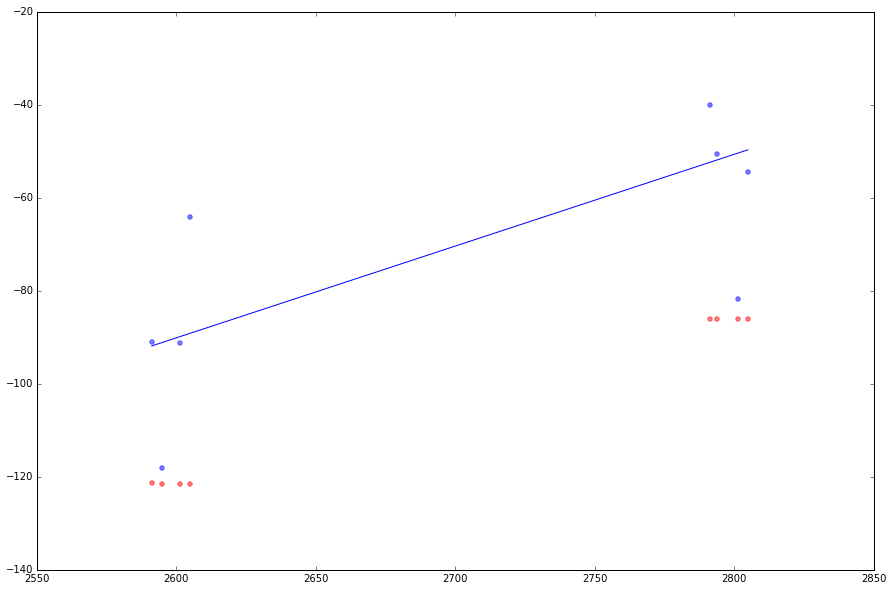

In [173]:
fig = plt.figure(figsize=(15,10))
plt.scatter(a.Wz, a.Wx, color='b', alpha=0.5)
plt.scatter(a.Z, a.X, color='r', alpha=0.5)
plt.plot(a.Z.values, lr.predict(a.Z.values.reshape(-1, 1)))
plt.show()

In [174]:
int_hits = a#[a.TrackID == 3]
b = a[a.TrackID == 2]

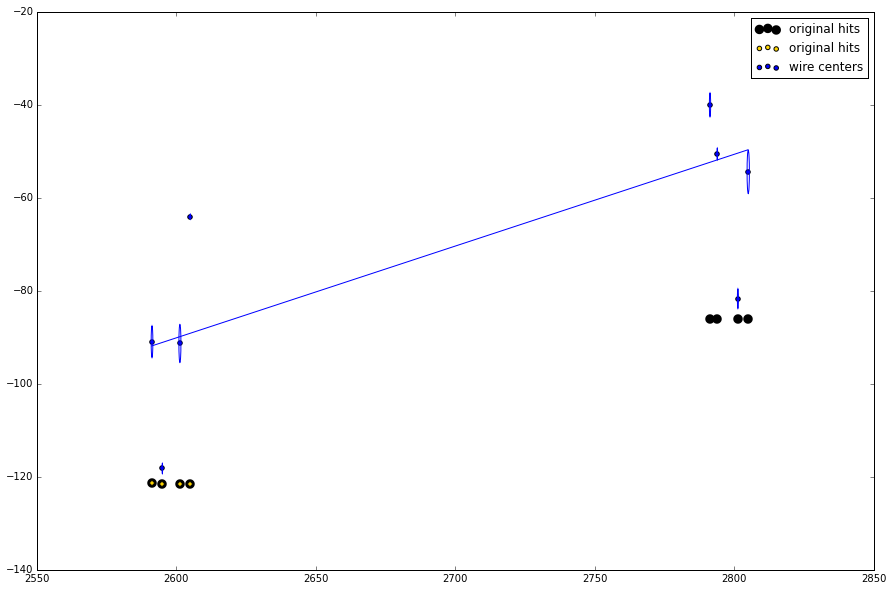

In [175]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits', linewidths=5)
plt.scatter(b.Z.values, b.X.values, c='gold', label='original hits', alpha=0.99)
#plt.plot(Z, X, c='r', label='original track')
plt.plot(a.Z.values, lr.predict(a.Z.values.reshape(-1, 1)))

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

In [ ]:
a

In [25]:
#event

### modify_for_xz_analysis_1_2

In [20]:
from UV_views import *
event_id = 1204
event2 = all_hits[all_hits['event'] == event_id]

event2 = modify_for_xz_analysis_1_2(event2)
event2

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,event,k,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz
49470,49470,-143.686371,151.249283,2591.145752,3,386.120728,1,1,0,0,...,1204,2,162.7886,-250,250,-263.236636,234.860713,140.380205,183.958076,2591.2793
49471,49471,-143.753265,151.255569,2592.255127,3,386.163116,1,1,0,1,...,1204,3,163.6686,-250,250,-263.313333,234.784016,141.256856,184.834727,2592.3793
49509,49509,11.350898,168.576553,2592.256348,2,386.487000,1,1,0,1,...,1204,41,167.1886,-250,250,-263.620121,234.477228,144.763461,188.341333,2592.3793
49472,49472,-143.909653,151.270126,2594.850098,3,386.237701,1,1,1,1,...,1204,4,163.2286,-250,250,-263.274984,234.822365,140.818530,184.396402,2594.9793
49510,49510,11.788525,168.680557,2594.843506,2,386.574707,1,1,1,1,...,1204,42,166.7486,-250,250,-263.581773,234.515576,144.325136,187.903007,2594.9793
49473,49473,-144.289520,151.305374,2601.149902,3,386.448273,1,2,0,0,...,1204,5,138.1486,-250,250,-237.008231,261.089118,159.411839,115.833967,2601.2793
49511,49511,12.859263,168.936554,2601.173340,2,386.795593,1,2,0,0,...,1204,43,169.8286,-250,250,-234.247137,263.850212,190.971287,147.393415,2601.2793
49474,49474,-144.446320,151.319641,2603.750000,3,386.544067,1,2,1,0,...,1204,6,137.7086,-250,250,-237.046579,261.050770,158.973513,115.395642,2603.8793
49512,49512,13.293871,169.040894,2603.741455,2,386.875092,1,2,1,0,...,1204,44,169.3886,-250,250,-234.285485,263.811864,190.532961,146.955090,2603.8793
49475,49475,-144.512711,151.325714,2604.850098,3,386.581573,1,2,1,1,...,1204,7,138.5886,-250,250,-236.969882,261.127467,159.850164,116.272293,2604.9793


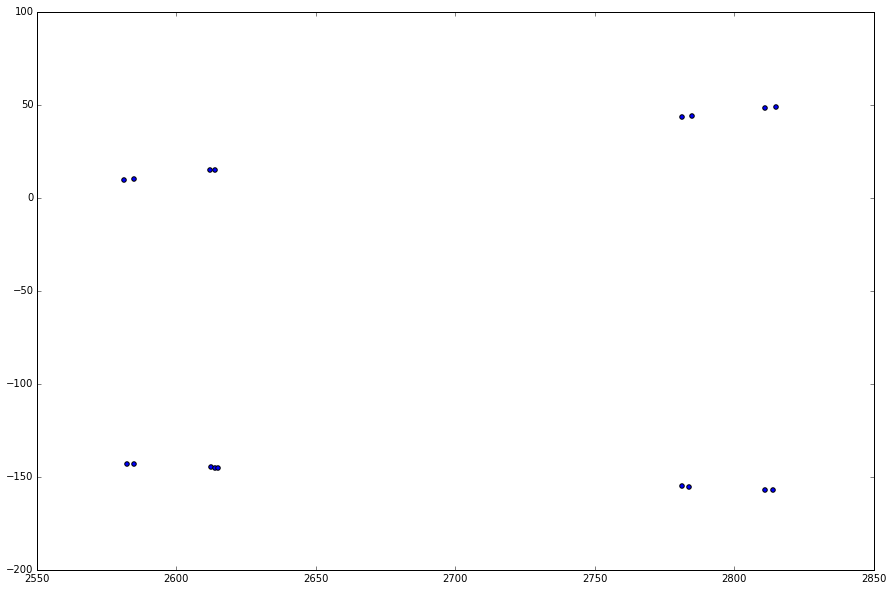

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(event.Z.values, event.X.values)
plt.show()

In [21]:
track2 = event2[event2.TrackID == 2]
track2

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,event,k,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz
49509,49509,11.350898,168.576553,2592.256348,2,386.487000,1,1,0,1,...,1204,41,167.1886,-250,250,-263.620121,234.477228,144.763461,188.341333,2592.3793
49510,49510,11.788525,168.680557,2594.843506,2,386.574707,1,1,1,1,...,1204,42,166.7486,-250,250,-263.581773,234.515576,144.325136,187.903007,2594.9793
49511,49511,12.859263,168.936554,2601.173340,2,386.795593,1,2,0,0,...,1204,43,169.8286,-250,250,-234.247137,263.850212,190.971287,147.393415,2601.2793
49512,49512,13.293871,169.040894,2603.741455,2,386.875092,1,2,1,0,...,1204,44,169.3886,-250,250,-234.285485,263.811864,190.532961,146.955090,2603.8793
49517,49517,45.048622,177.726547,2791.159180,2,393.236023,2,1,0,0,...,1204,49,173.3486,-250,250,-264.157001,233.940349,150.900021,194.477892,2791.2793
49518,49518,45.485767,177.866531,2793.738037,2,393.325165,2,1,1,0,...,1204,50,172.9086,-250,250,-264.118652,233.978697,150.461695,194.039566,2793.8793
49519,49519,46.921825,178.332214,2802.217529,2,393.620850,2,2,0,1,...,1204,51,181.2686,-250,250,-233.250075,264.847274,202.367754,158.789883,2802.3793
49520,49520,47.179417,178.416809,2803.740967,2,393.661682,2,2,1,0,...,1204,52,181.7086,-250,250,-233.211727,264.885623,202.806080,159.228208,2803.8793


### get_xz

In [22]:
[plane_k, plane_b] = np.polyfit(track2.Z.values, track2.Y.values, 1)

int_hits = get_xz(plane_k, plane_b, track2)
int_hits

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,...,Wu,Wv1,Wv2,Wx1,Wx2,Wy1,Wy2,Wz,Wy,Wx
49509,49509,11.350898,168.576553,2592.256348,2,386.487000,1,1,0,1,...,167.1886,-250,250,-263.620121,234.477228,144.763461,188.341333,2592.3793,168.546779,8.224447
49510,49510,11.788525,168.680557,2594.843506,2,386.574707,1,1,1,1,...,166.7486,-250,250,-263.581773,234.515576,144.325136,187.903007,2594.9793,168.667568,14.653508
49511,49511,12.859263,168.936554,2601.173340,2,386.795593,1,2,0,0,...,169.8286,-250,250,-234.247137,263.850212,190.971287,147.393415,2601.2793,168.960250,17.340163
49512,49512,13.293871,169.040894,2603.741455,2,386.875092,1,2,1,0,...,169.3886,-250,250,-234.285485,263.811864,190.532961,146.955090,2603.8793,169.081039,10.911101
49517,49517,45.048622,177.726547,2791.159180,2,393.236023,2,1,0,0,...,173.3486,-250,250,-264.157001,233.940349,150.900021,194.477892,2791.2793,177.787157,43.164370
49518,49518,45.485767,177.866531,2793.738037,2,393.325165,2,1,1,0,...,172.9086,-250,250,-264.118652,233.978697,150.461695,194.039566,2793.8793,177.907946,49.593431
49519,49519,46.921825,178.332214,2802.217529,2,393.620850,2,2,0,1,...,181.2686,-250,250,-233.250075,264.847274,202.367754,158.789883,2802.3793,178.302834,41.813222
49520,49520,47.179417,178.416809,2803.740967,2,393.661682,2,2,1,0,...,181.7086,-250,250,-233.211727,264.885623,202.806080,159.228208,2803.8793,178.372520,46.065140


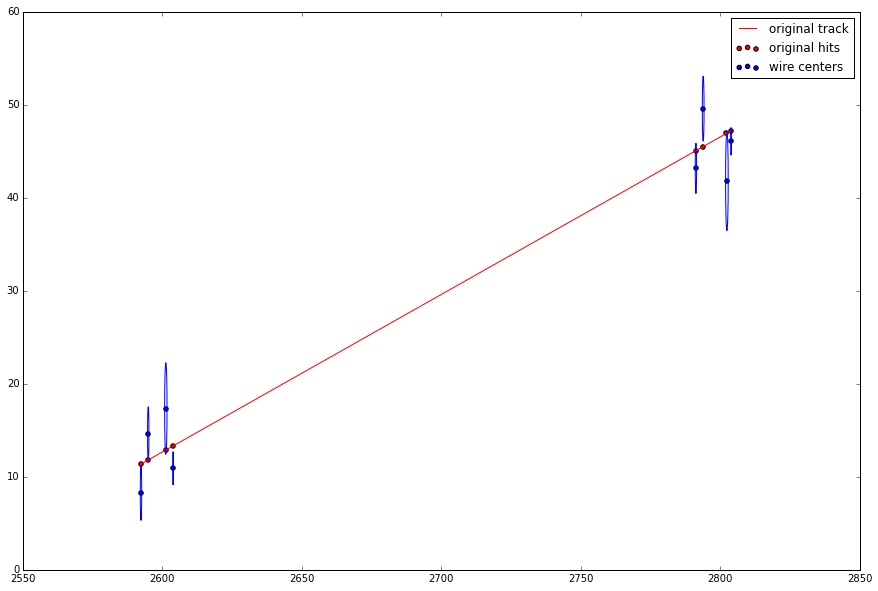

In [23]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

### conventor_xz

In [24]:
hits2 = conventor_xz(track2, 0)
hits2

{2592.3793000000001: {49509: <UV_views.parametresXZ instance at 0x110532cf8>},
 2594.9793: {49510: <UV_views.parametresXZ instance at 0x10f3e83f8>},
 2601.2793000000001: {49511: <UV_views.parametresXZ instance at 0x10f3e8560>},
 2603.8793000000001: {49512: <UV_views.parametresXZ instance at 0x10f370f80>},
 2791.2793000000001: {49517: <UV_views.parametresXZ instance at 0x10f370950>},
 2793.8793000000001: {49518: <UV_views.parametresXZ instance at 0x110502e60>},
 2802.3793000000001: {49519: <UV_views.parametresXZ instance at 0x110502560>},
 2803.8793000000001: {49520: <UV_views.parametresXZ instance at 0x110502098>}}

### points_crossing_line_xz

In [25]:
intersecting_hits = {}
tmp = {}

k = plane_k
b = plane_b

hits_xz = get_xz(k, b, track2)

# TODO: the loop optimization
for z in hits2:

    y = k * z + b

    for hit_index in hits2[z]:

        x = hits_xz.loc[[hit_index]].Wx.values[0]

        if ((x > -250) & (x < 250) & (not hits2[z][hit_index].used)):

            hits2[z][hit_index].x = x
            tmp[hit_index] = x
            intersecting_hits.setdefault(z, []).append(hit_index)

In [26]:
[k, b] = np.polyfit(track2.Z.values, track2.X.values, 1)

_, crossing_points2, lin_regr2 = points_crossing_line_xz(k, b, 15, hits2, intersecting_hits, 6)

crossing_points2, lin_regr2

([49519, 49511, 49509, 49517, 49518, 49512, 49520, 49510],
 array([  1.61819131e-01,  -4.07616015e+02]))

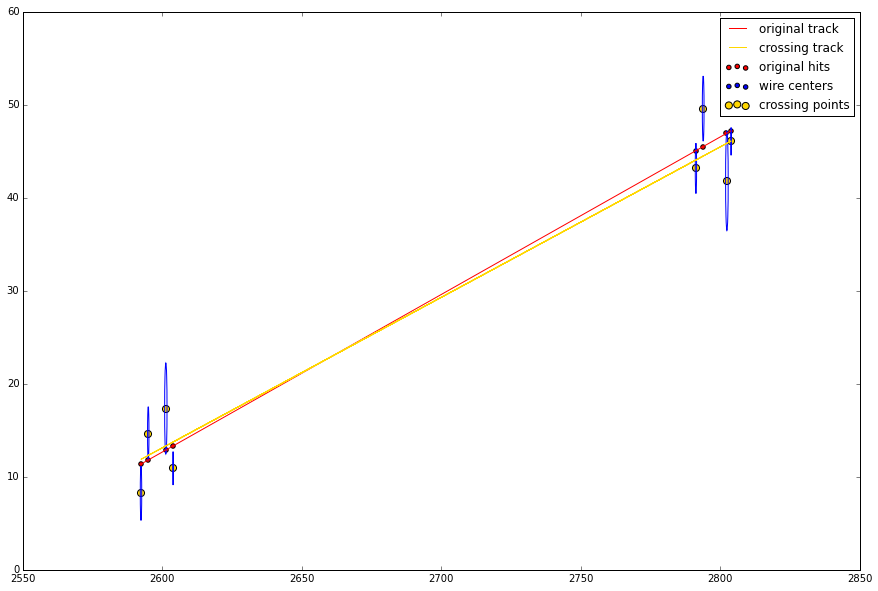

In [27]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# crossing point
Z_crossing = np.array([int_hits.loc[i].Wz for i in crossing_points2])
X_crossing = np.array([int_hits.loc[i].Wx for i in crossing_points2])
X_line_crossing = Z_crossing * lin_regr2[0] + lin_regr2[1]

plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')


plt.legend(loc='best')
plt.show()

### loop_xz

In [28]:
new_tracks, new_linking_table, x_coordinates = loop_xz(event2, tracks, linking_table, 6, 10, 0)

IndexError: list index out of range

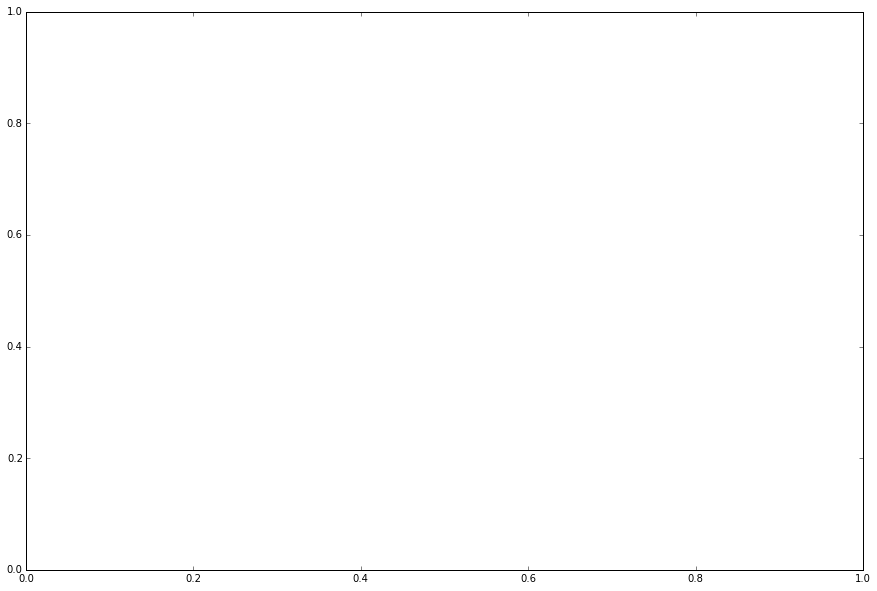

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[1]]
Wx = [x_coordinates[i] for i in new_linking_table.values()[0]] + \
     [x_coordinates[i] for i in new_linking_table.values()[1]] 
Z = [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[1]]
X = [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[1]]

R = np.array([event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[1]]) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(len(Z),))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, len(Wz)):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# loop_yz
for key in new_linking_table:
    
    crossing_points = new_linking_table[key]
    lin_regr = new_tracks[key]
    Z_crossing = np.array([event2.loc[i].Wz for i in crossing_points])
    X_crossing = np.array([x_coordinates[i] for i in crossing_points])
    X_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Y-view pattern recognition. 3&4 stations.

### modify_for_yz_analysis

In [27]:
from Y_views import *
event_id = 2
event = all_hits[all_hits['event'] == event_id]

event = modify_for_yz_analysis_3_4(event)
event

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
58,58,57.558144,10.965934,3321.156982,3,408.579224,3,0,0,0,278,0.474116,2,17,11.4286,3321.15
59,59,57.548088,10.981816,3322.243896,3,408.611115,3,0,0,1,279,0.421861,2,18,10.5486,3322.25
98,98,81.869873,-1.444798,3322.251465,2,408.606445,3,0,0,1,286,0.315205,2,57,-1.7714,3322.25
60,60,57.534149,11.003839,3323.750000,3,408.653229,3,0,1,0,278,0.003839,2,19,10.9886,3323.75
99,99,81.887085,-1.452010,3323.749268,2,408.653168,3,0,1,0,285,0.132011,2,58,-1.3314,3323.75
66,66,57.279995,11.408733,3351.150391,3,409.567413,3,3,0,0,278,0.031270,2,25,11.4286,3351.15
104,104,82.214432,-1.590673,3352.250732,2,409.604370,3,3,0,1,286,0.169329,2,63,-1.7714,3352.25
67,67,57.255859,11.447518,3353.743408,3,409.663696,3,3,1,0,278,0.447569,2,26,10.9886,3353.75
105,105,82.231628,-1.598032,3353.748535,2,409.656219,3,3,1,0,285,0.278036,2,64,-1.3314,3353.75
68,68,57.245502,11.464171,3354.856201,3,409.698792,3,3,1,1,278,0.415875,2,27,11.8686,3354.85


In [28]:
track = event[event.TrackID == 2]
track

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k,Wy,Wz
98,98,81.869873,-1.444798,3322.251465,2,408.606445,3,0,0,1,286,0.315205,2,57,-1.7714,3322.25
99,99,81.887085,-1.452010,3323.749268,2,408.653168,3,0,1,0,285,0.132011,2,58,-1.3314,3323.75
104,104,82.214432,-1.590673,3352.250732,2,409.604370,3,3,0,1,286,0.169329,2,63,-1.7714,3352.25
105,105,82.231628,-1.598032,3353.748535,2,409.656219,3,3,1,0,285,0.278036,2,64,-1.3314,3353.75
106,106,84.152946,-2.453004,3521.150879,2,415.238953,4,0,0,0,286,0.186998,2,65,-2.6514,3521.15
107,107,84.195389,-2.472446,3524.848633,2,415.363831,4,0,1,1,286,0.272450,2,66,-2.2114,3524.85
113,113,84.497162,-2.611311,3551.150146,2,416.238464,4,3,0,0,286,0.028689,2,72,-2.6514,3551.15
114,114,84.527008,-2.625106,3553.752441,2,416.335693,4,3,1,0,286,0.454900,2,73,-3.0914,3553.75
115,115,84.539574,-2.630958,3554.847656,2,416.370453,4,3,1,1,286,0.430964,2,74,-2.2114,3554.85


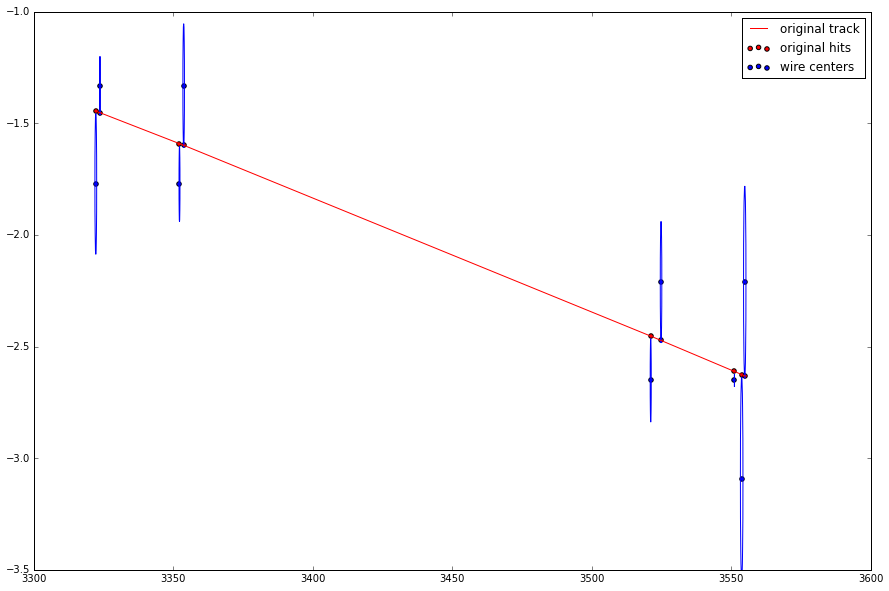

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)


plt.legend(loc='best')
plt.show()

### conventor_yz

In [30]:
hits = conventor_yz(event, 1)
hits

{3321.1500000000001: [<Y_views.ParametresYZ instance at 0x11155ea28>],
 3322.25: [<Y_views.ParametresYZ instance at 0x11162fc20>,
  <Y_views.ParametresYZ instance at 0x11162f488>],
 3323.75: [<Y_views.ParametresYZ instance at 0x11162fe60>,
  <Y_views.ParametresYZ instance at 0x11162fb00>],
 3351.1500000000001: [<Y_views.ParametresYZ instance at 0x11162f9e0>],
 3352.25: [<Y_views.ParametresYZ instance at 0x11162f4d0>],
 3353.75: [<Y_views.ParametresYZ instance at 0x11162ff38>,
  <Y_views.ParametresYZ instance at 0x11162f5a8>],
 3354.8499999999999: [<Y_views.ParametresYZ instance at 0x11162fb48>],
 3521.1500000000001: [<Y_views.ParametresYZ instance at 0x11162fcf8>],
 3522.25: [<Y_views.ParametresYZ instance at 0x11162f098>],
 3523.75: [<Y_views.ParametresYZ instance at 0x11162f680>],
 3524.8499999999999: [<Y_views.ParametresYZ instance at 0x11162fa28>,
  <Y_views.ParametresYZ instance at 0x11162fc68>],
 3551.1500000000001: [<Y_views.ParametresYZ instance at 0x11162f998>,
  <Y_views.Para

### points_crossing_line_yz

In [31]:
z1 = track.Wz.min()
z2 = track.Wz.max()
y1 = track.Wy.min()
y2 = track.Wy.max()

plane_k = (y2 - y1) / (z2 - z1)
plane_b = y1 - plane_k * z1
plane_width = 0.85
n_min = 7



_, crossing_points, lin_regr = points_crossing_line_yz(plane_k, plane_b, plane_width, hits, n_min)

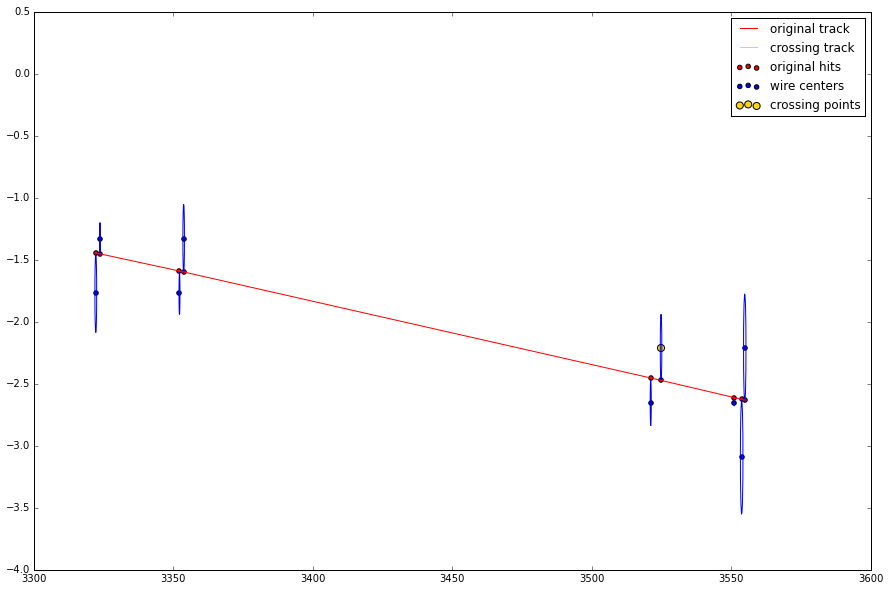

In [32]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = track.Wz.values
Wy = track.Wy.values
Z = track.Z.values
Y = track.Y.values
R = track.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.plot(Z, Y, c='r', label='original track')
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# crossing point
Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

### loop_yz

In [33]:
tracks, linking_table = loop_yz(event, 7, 0.87, 1)

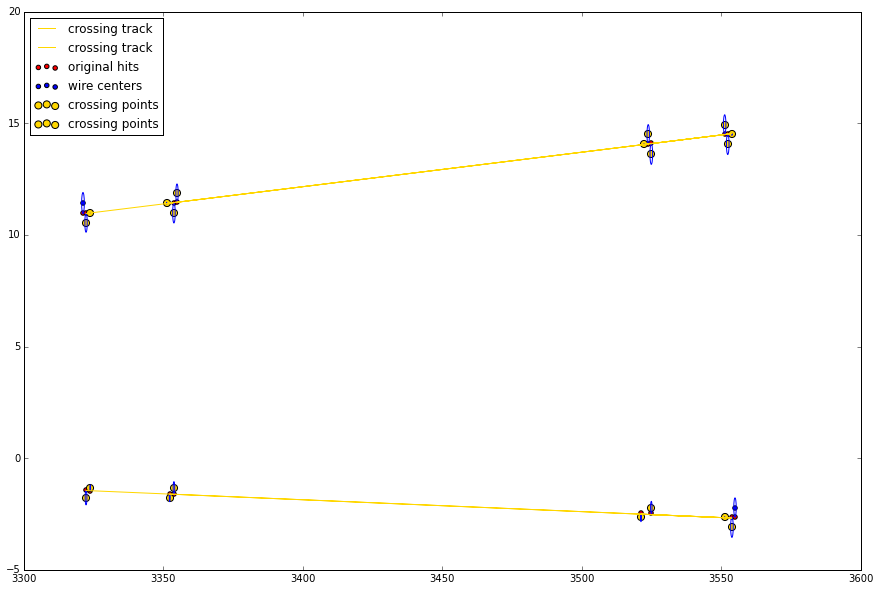

In [34]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = event.Wz.values
Wy = event.Wy.values
Z = event.Z.values
Y = event.Y.values
R = event.dist2Wire.values
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, Y, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wy, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    circ = plt.Circle((Wz[index], Wy[index]), radius=R[index], color='b', fill=False)
    ax.add_patch(circ)
    
# loop_yz
for key in linking_table:
    
    crossing_points = linking_table[key]
    lin_regr = tracks[key
                     ]
    Z_crossing = np.array([event.loc[i].Wz for i in crossing_points])
    Y_crossing = np.array([event.loc[i].Wy for i in crossing_points])
    Y_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, Y_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, Y_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Stereo-view pattern recognition. 1&2 stations.

### modify_for_xz_analysis_1_2

In [35]:
from UV_views import *
event_id = 2
event2 = all_hits[all_hits['event'] == event_id]

event2 = modify_for_xz_analysis_3_4(event2)
event2

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wx2,Wy1,Wy2,Wz,X,Y,Z,dist2Wire,event,k
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,248.512789,-15.663733,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20
100,100,1,0,3,290,408.937164,2,1,-8.8114,-250,...,249.816639,-30.566806,13.011066,3332.3793,81.984741,-1.493074,3332.250977,0.167169,2,59
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,248.551137,-16.102059,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21
101,101,0,1,3,289,408.989105,2,1,-8.3714,-250,...,249.778290,-30.128480,13.449391,3333.8793,82.001945,-1.500333,3333.748291,0.281569,2,60
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,248.474440,-15.225407,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,250.428228,37.557303,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23
102,102,1,0,3,282,409.274353,2,2,5.2686,-250,...,249.507863,27.037487,-16.540384,3342.3793,82.099594,-1.541715,3342.251221,0.339606,2,61
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,250.466576,37.995629,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24
103,103,0,1,3,281,409.320129,2,2,5.7086,-250,...,249.546212,27.475813,-16.102059,3343.8793,82.116806,-1.549026,3343.749512,0.106181,2,62
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,248.206001,-12.157128,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31


In [36]:
track2 = event2[event2.TrackID == 3]
track2

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wx2,Wy1,Wy2,Wz,X,Y,Z,dist2Wire,event,k
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,248.512789,-15.663733,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,248.551137,-16.102059,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,248.474440,-15.225407,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,250.428228,37.557303,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,250.466576,37.995629,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,248.206001,-12.157128,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31
73,73,0,1,4,279,415.659607,3,1,9.2286,-250,...,248.244349,-12.595453,30.982418,3533.8793,55.581013,14.244566,3533.748291,0.106172,2,32
74,74,1,0,4,274,415.944336,3,2,19.3486,-250,...,250.735016,41.063908,-2.513963,3542.3793,55.502087,14.380896,3542.252930,0.196525,2,33
75,75,1,1,4,274,416.032471,3,2,18.9086,-250,...,250.696668,40.625583,-2.952289,3544.9793,55.478035,14.422523,3544.845703,0.282903,2,34


### get_xz

In [37]:
[plane_k, plane_b] = np.polyfit(track2.Z.values, track2.Y.values, 1)

int_hits = get_xz(plane_k, plane_b, track2)
int_hits

,Index,LayerNb,PlaneNb,StatNb,StrawNb,Time,TrackID,ViewNb,Wu,Wv1,...,Wy2,Wz,X,Y,Z,dist2Wire,event,k,Wy,Wx
61,61,0,0,3,281,408.900513,3,1,6.1486,-250,...,27.914138,3331.2793,57.465652,11.112240,3331.151611,0.098519,2,20,11.109923,56.439727
62,62,0,1,3,281,408.992798,3,1,5.7086,-250,...,27.475813,3333.8793,57.441654,11.150424,3333.744141,0.381669,2,21,11.150206,61.948597
63,63,1,1,3,281,409.037476,3,1,6.5886,-250,...,28.352464,3334.9793,57.431343,11.166897,3334.857666,0.481129,2,22,11.167249,52.046529
64,64,1,0,3,276,409.276886,3,2,15.8286,-250,...,-6.020568,3342.3793,57.362732,11.276179,3342.244629,0.392800,2,23,11.281900,52.660110
65,65,0,1,3,275,409.320526,3,2,16.2686,-250,...,-5.582243,3343.8793,57.348743,11.298553,3343.750244,0.026172,2,24,11.305140,57.442908
72,72,0,0,4,279,415.578735,3,1,9.6686,-250,...,31.420744,3531.2793,55.605080,14.203090,3531.156250,0.377312,2,31,14.208609,51.470402
73,73,0,1,4,279,415.659607,3,1,9.2286,-250,...,30.982418,3533.8793,55.581013,14.244566,3533.748291,0.106172,2,32,14.248892,56.979272
74,74,1,0,4,274,415.944336,3,2,19.3486,-250,...,-2.513963,3542.3793,55.502087,14.380896,3542.252930,0.196525,2,33,14.380586,57.629435
75,75,1,1,4,274,416.032471,3,2,18.9086,-250,...,-2.952289,3544.9793,55.478035,14.422523,3544.845703,0.282903,2,34,14.420869,52.120566


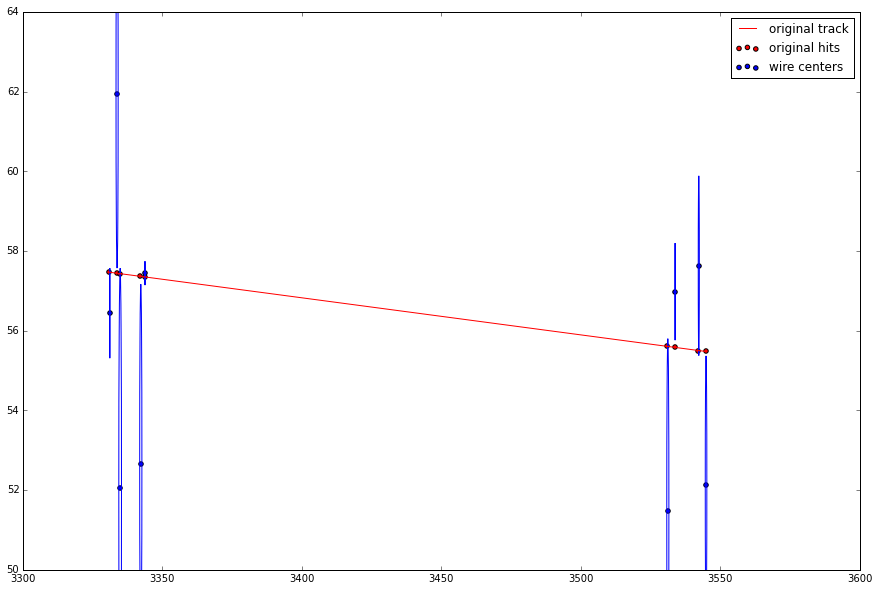

In [38]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)


plt.legend(loc='best')
plt.show()

### conventor_xz

In [39]:
hits2 = conventor_xz(track2, 1)
hits2

{3331.2793000000001: {61: <UV_views.parametresXZ instance at 0x11156d368>},
 3333.8793000000001: {62: <UV_views.parametresXZ instance at 0x11266bab8>},
 3334.9793: {63: <UV_views.parametresXZ instance at 0x11266bb90>},
 3342.3793000000001: {64: <UV_views.parametresXZ instance at 0x11014d3b0>},
 3343.8793000000001: {65: <UV_views.parametresXZ instance at 0x11014da70>},
 3531.2793000000001: {72: <UV_views.parametresXZ instance at 0x10e1ccdd0>},
 3533.8793000000001: {73: <UV_views.parametresXZ instance at 0x10e1ccb00>},
 3542.3793000000001: {74: <UV_views.parametresXZ instance at 0x10e1cc7a0>},
 3544.9793: {75: <UV_views.parametresXZ instance at 0x10e1cccb0>}}

### points_crossing_line_xz

In [40]:
intersecting_hits = {}
tmp = {}

k = plane_k
b = plane_b

hits_xz = get_xz(k, b, track2)

# TODO: the loop optimization
for z in hits2:

    y = k * z + b

    for hit_index in hits2[z]:

        x = hits_xz.loc[[hit_index]].Wx.values[0]

        if ((x > -250) & (x < 250) & (not hits2[z][hit_index].used)):

            hits2[z][hit_index].x = x
            tmp[hit_index] = x
            intersecting_hits.setdefault(z, []).append(hit_index)

In [41]:
[k, b] = np.polyfit(track2.Z.values, track2.X.values, 1)

_, crossing_points2, lin_regr2 = points_crossing_line_xz(k, b, 15, hits2, intersecting_hits, 6)

crossing_points2, lin_regr2

([62, 61, 64, 63, 72, 65, 73, 74, 75],
 array([ -7.88998838e-03,   8.24506907e+01]))

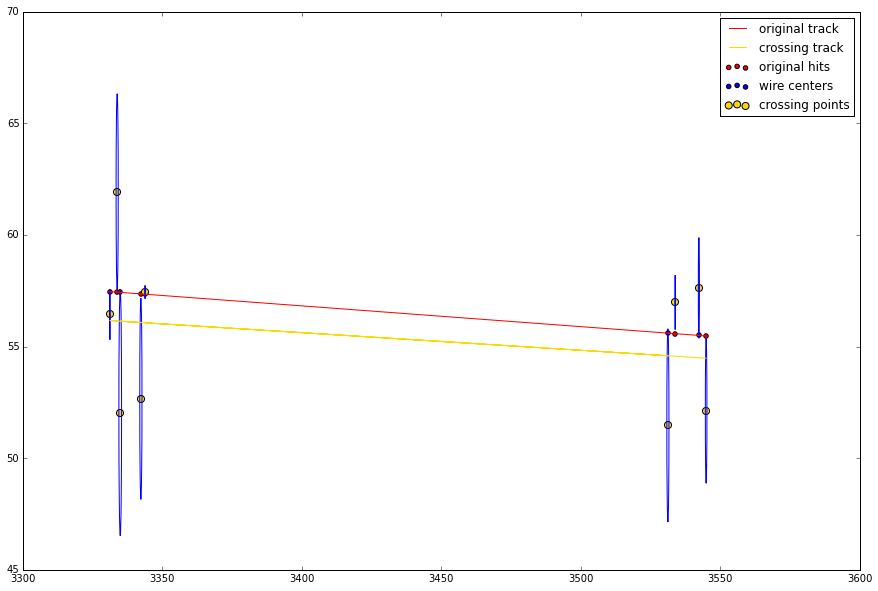

In [42]:
import matplotlib as mpl
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = int_hits.Wz.values
Wx = int_hits.Wx.values
Z = int_hits.Z.values
X = int_hits.X.values
R = (int_hits.dist2Wire.values) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(Z.shape[0],))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')
plt.plot(Z, X, c='r', label='original track')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, Z.shape[0]):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# crossing point
Z_crossing = np.array([int_hits.loc[i].Wz for i in crossing_points2])
X_crossing = np.array([int_hits.loc[i].Wx for i in crossing_points2])
X_line_crossing = Z_crossing * lin_regr2[0] + lin_regr2[1]

plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')


plt.legend(loc='best')
plt.show()

### loop_xz

In [43]:
new_tracks, new_linking_table, x_coordinates = loop_xz(event2, tracks, linking_table, 6, 15, 1)

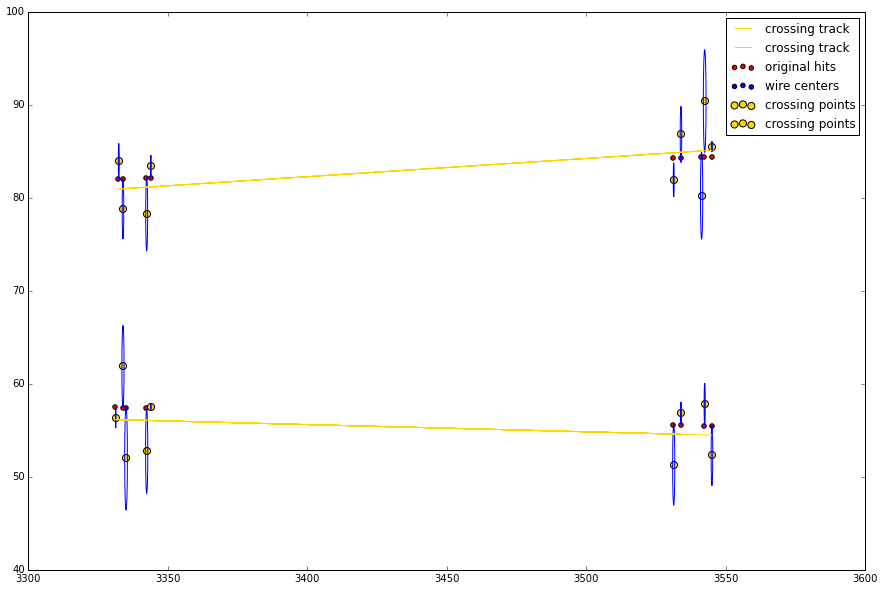

In [44]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

Wz = [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].Wz.values[0] for i in new_linking_table.values()[1]]
Wx = [x_coordinates[i] for i in new_linking_table.values()[0]] + \
     [x_coordinates[i] for i in new_linking_table.values()[1]] 
Z = [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].Z.values[0] for i in new_linking_table.values()[1]]
X = [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[0]] + \
    [event2.loc[[i]].X.values[0] for i in new_linking_table.values()[1]]

R = np.array([event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[0]] + \
     [event2.loc[[i]].dist2Wire.values[0] for i in new_linking_table.values()[1]]) / np.sin(5. * np.pi / 180.)
StrwR = 0.5 * numpy.ones(shape=(len(Z),))

# originl track and hits
plt.scatter(Z, X, c='r', label='original hits')

# The wire centers and dist2wire
plt.scatter(Wz, Wx, c='b', label='wire centers')
for index in range(0, len(Wz)):
    ellipse = mpl.patches.Ellipse(xy=(Wz[index], Wx[index]), width=2*R[index]*np.sin(5.*np.pi/180.),
                                  height=2*R[index], color='b', fill=False)
    ax.add_patch(ellipse)
    
# loop_yz
for key in new_linking_table:
    
    crossing_points = new_linking_table[key]
    lin_regr = new_tracks[key]
    Z_crossing = np.array([event2.loc[i].Wz for i in crossing_points])
    X_crossing = np.array([x_coordinates[i] for i in crossing_points])
    X_line_crossing = Z_crossing * lin_regr[0] + lin_regr[1]

    plt.scatter(Z_crossing, X_crossing, c='gold', label='crossing points', s=50)
    plt.plot(Z_crossing, X_line_crossing , c='gold', label='crossing track')



plt.legend(loc='best')
plt.show()

# Efficiency

In [45]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events12 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.7, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 0)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events12[event_id] = reco

In [46]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events34 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.7, 1)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 1)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events34[event_id] = reco

### Efficiency 1&2 stations

In [47]:
from efficiency import efficiency

eff_y, eff_stereo, eff_station = efficiency(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events12)

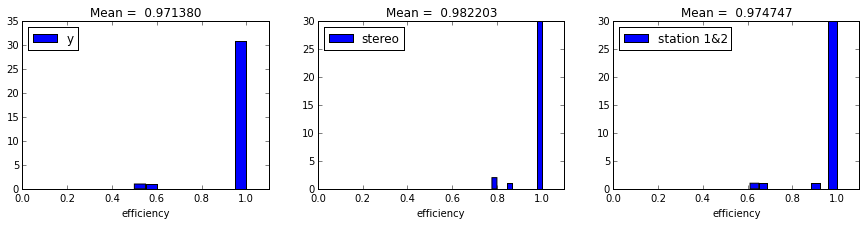

In [48]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Efficiency for 3&4 stations

In [49]:
from efficiency import efficiency

eff_y, eff_stereo, eff_station = efficiency(reconstructible_events.keys(), 
                                            all_hits, 
                                            reco_events34)

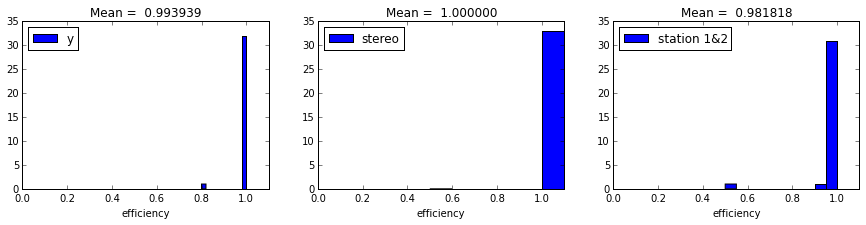

In [50]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Matching and combination

### Dist y & dist x 

In [51]:
from MatchTracks import get_matched_tracks

match_tracks, dist_y, dist_x = get_matched_tracks(reco_events12, reco_events34)

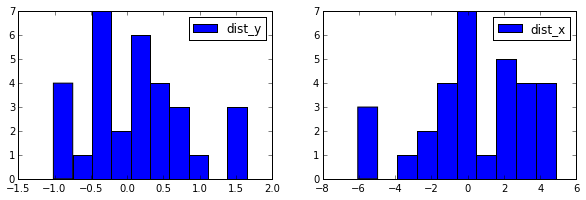

In [52]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
plt.hist(dist_y, label='dist_y', bins=10)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.hist(dist_x, label='dist_x', bins=10)
plt.legend(loc='best')

plt.show()